In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data() 

In [4]:
print(f'Shape of the training data: {x_train.shape}')
print(f'Shape of the training target: {y_train.shape}')
print(f'Shape of the test data: {x_test.shape}')
print(f'Shape of the test target: {y_test.shape}')

Shape of the training data: (60000, 28, 28)
Shape of the training target: (60000,)
Shape of the test data: (10000, 28, 28)
Shape of the test target: (10000,)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D # convolution layers
from tensorflow.keras.layers import Dense, Dropout, Flatten # core layers

from tensorflow.keras.utils import to_categorical

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f"Label size {y_train.shape}")
print(f"Label size {y_test.shape}")

Label size (60000, 10)
Label size (10000, 10)


In [7]:
print(y_train[0])
print(y_train[0].argmax())

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5


#### Plotting Images

In [8]:
print(x_train.shape)

(60000, 28, 28)


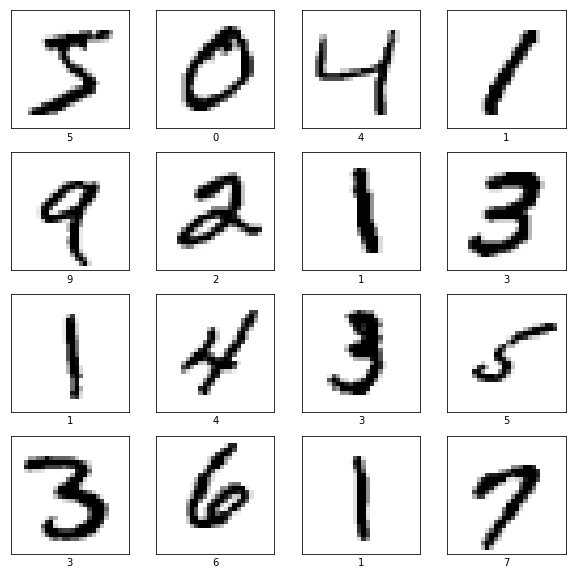

In [9]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i].argmax())
plt.show()


In [10]:
# Reshaping the data
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

# Normalizing
x_train = x_train/255
x_test = x_test/255

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


#### Build the Model

In [11]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu',padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.1))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
epochs=10
history = model.fit(x_train,y_train, 
                    epochs = epochs, batch_size=64,
                    validation_data = (x_test,y_test),
                    verbose=1)

Epoch 1/10
938/938 [==============================] - 135s 143ms/step - loss: 0.3408 - accuracy: 0.8951 - val_loss: 0.0530 - val_accuracy: 0.9829
Epoch 2/10
938/938 [==============================] - 128s 136ms/step - loss: 0.0496 - accuracy: 0.9839 - val_loss: 0.0419 - val_accuracy: 0.9854
Epoch 3/10
938/938 [==============================] - 138s 147ms/step - loss: 0.0321 - accuracy: 0.9900 - val_loss: 0.0313 - val_accuracy: 0.9895
Epoch 4/10
938/938 [==============================] - 133s 142ms/step - loss: 0.0243 - accuracy: 0.9929 - val_loss: 0.0425 - val_accuracy: 0.9862
Epoch 5/10
938/938 [==============================] - 135s 144ms/step - loss: 0.0205 - accuracy: 0.9932 - val_loss: 0.0250 - val_accuracy: 0.9917
Epoch 6/10
938/938 [==============================] - 133s 141ms/step - loss: 0.0159 - accuracy: 0.9948 - val_loss: 0.0237 - val_accuracy: 0.9915
Epoch 7/10
938/938 [==============================] - 128s 137ms/step - loss: 0.0109 - accuracy: 0.9967 - val_loss: 0.0263 -

In [30]:
print(history.history)

{'loss': [0.15098688006401062, 0.046927887946367264, 0.032632019370794296, 0.025483591482043266, 0.020008128136396408, 0.016496123746037483, 0.013062015175819397, 0.011511617340147495, 0.010642281733453274, 0.008140991441905499], 'accuracy': [0.9543333053588867, 0.9852833151817322, 0.9893500208854675, 0.9923999905586243, 0.9933000206947327, 0.9947166442871094, 0.9958999752998352, 0.9959999918937683, 0.996399998664856, 0.9975000023841858], 'val_loss': [0.05302583798766136, 0.04192470759153366, 0.0313355028629303, 0.04248113930225372, 0.024979157373309135, 0.023677285760641098, 0.026294391602277756, 0.03363880515098572, 0.030651966109871864, 0.02420012280344963], 'val_accuracy': [0.9829000234603882, 0.9854000210762024, 0.9894999861717224, 0.9861999750137329, 0.9916999936103821, 0.9915000200271606, 0.9921000003814697, 0.991100013256073, 0.991100013256073, 0.9922000169754028]}


#### Plot Training and Validation Loss and Accuracy

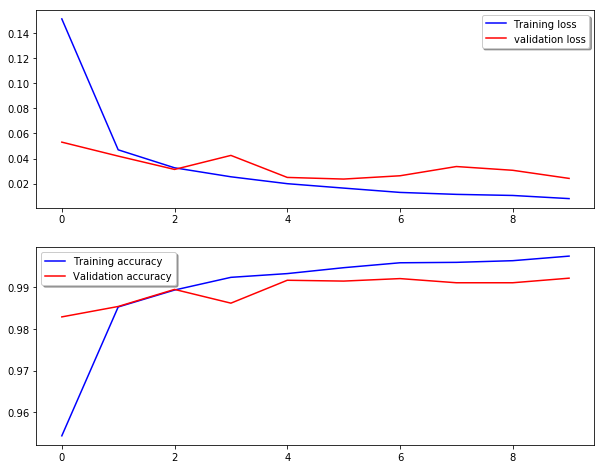

In [13]:
fig, ax = plt.subplots(2,1, figsize=(10, 8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

#### Making Predictions

In [14]:
y_pred = model.predict(x_test)
y_pred

array([[6.73271592e-15, 1.20206470e-10, 2.10162660e-12, ...,
        1.00000000e+00, 4.01413955e-13, 1.56955196e-08],
       [2.23061673e-12, 9.17854768e-12, 1.00000000e+00, ...,
        2.35259471e-14, 3.84041926e-14, 7.82478502e-16],
       [4.05341316e-09, 9.99999166e-01, 6.48365805e-11, ...,
        2.85506502e-07, 4.88046169e-07, 2.12331415e-08],
       ...,
       [9.34757416e-19, 2.08575504e-10, 4.81530904e-15, ...,
        4.60153859e-10, 7.94211008e-09, 3.83152288e-10],
       [3.29090560e-10, 2.64516685e-12, 1.06982955e-11, ...,
        2.25531179e-14, 1.87641301e-04, 3.98365368e-13],
       [3.99487163e-08, 1.06734240e-12, 2.19831288e-13, ...,
        4.83034006e-15, 1.10119629e-08, 9.30545224e-11]], dtype=float32)

In [15]:
print(y_pred[0])
print(y_pred[0].argmax())

[6.7327159e-15 1.2020647e-10 2.1016266e-12 1.9904549e-09 1.3896662e-11
 2.5265617e-14 2.9359348e-16 1.0000000e+00 4.0141396e-13 1.5695520e-08]
7


In [16]:
y_pred_labels=[]
print(len(y_pred))
for i in range(len(y_pred)):
    y_pred_labels.append(y_pred[i].argmax())
print(y_pred_labels)

10000
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 5, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 

In [17]:
print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
y_test_labels=[]
print(len(y_test))
for i in range(len(y_test)):
    y_test_labels.append(y_test[i].argmax())
print(y_test_labels)

10000
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_labels,y_pred_labels)

array([[ 976,    0,    0,    0,    0,    2,    0,    1,    1,    0],
       [   0, 1134,    0,    0,    0,    0,    1,    0,    0,    0],
       [   0,    0, 1027,    1,    1,    0,    1,    2,    0,    0],
       [   0,    0,    0, 1004,    0,    4,    0,    0,    2,    0],
       [   0,    1,    0,    0,  977,    0,    0,    0,    0,    4],
       [   0,    0,    0,    5,    0,  886,    1,    0,    0,    0],
       [   0,    1,    0,    0,    2,    4,  950,    0,    1,    0],
       [   0,    6,    5,    1,    1,    0,    0, 1013,    1,    1],
       [   3,    0,    3,    1,    0,    0,    0,    0,  966,    1],
       [   0,    1,    1,    1,    7,    5,    0,    4,    1,  989]],
      dtype=int64)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test_labels,y_pred_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



#### Plotting Predictions

TypeError: Invalid dimensions for image data

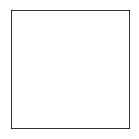

In [25]:
# y_pred = model.predict(x_test)
# test_img = x_test.reshape(x_test.shape[0], 28, 28)

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(f'Predicted - {y_pred[i].argmax()}')
plt.show()

In [27]:
print(x_test.shape)

(10000, 28, 28, 1)


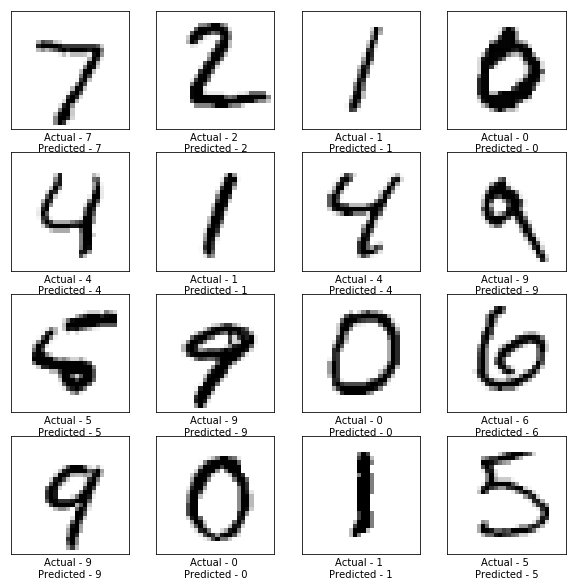

In [29]:
test_img = x_test.reshape(x_test.shape[0], 28, 28)

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_img[i], cmap=plt.cm.binary)
    plt.xlabel(f'Actual - {y_test[i].argmax()} \nPredicted - {y_pred[i].argmax()}')
plt.show()